
## Questions

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4

# Import necessary Libraries

In [112]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report
import matplotlib.pyplot as plt


# Load Dataset

In [113]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Data Exploration

In [114]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [115]:
# Check summary statistics fro numerical
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [116]:
# Check summary statistics for categorical
df.describe(include= 'object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [117]:
# check missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [118]:
# check missing values percentage
(df.isna().mean() * 100).round(2)

App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

In [119]:
# Check duplicates
df.duplicated().sum()

483

In [120]:
df[df.App == 'Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [121]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [122]:
df.drop_duplicates(inplace= True, ignore_index= True)

In [123]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [124]:
# check missing values percentage
(df.isna().mean() * 100).round(2)

App                0.00
Category           0.00
Rating            14.14
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.08
Android Ver        0.03
dtype: float64

# Data Cleaning

### For Numerical Columns

In [125]:
px.histogram(data_frame= df, x= 'Rating')

In [126]:
drop_index = df[df.Rating == 19].index
drop_index

Index([9990], dtype='int64')

In [127]:
df.drop(drop_index, inplace= True)

In [128]:
df.reset_index(drop= True, inplace= True)

In [129]:
px.histogram(data_frame= df, x= 'Rating')

### For Categorical Columns

In [130]:
cat_cols = df.select_dtypes(include= 'object').columns
cat_cols

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [131]:
for col in cat_cols:

    print(col)
    print(df[col].nunique())
    print(df[col].unique())
    print('-' * 100)

App
9659
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
----------------------------------------------------------------------------------------------------
Category
33
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
----------------------------------------------------------------------------------------------------
Reviews
6001
['159' '967' '87510' ... '603' '1195' '398307']
------------

In [132]:
df[df['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10242,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10282,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10342,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [133]:
df.Reviews = df.Reviews.astype('int')
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10352        38
10353         4
10354         3
10355       114
10356    398307
Name: Reviews, Length: 10357, dtype: int32

In [134]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10352                   53M
10353                  3.6M
10354                  9.5M
10355    Varies with device
10356                   19M
Name: Size, Length: 10357, dtype: object

In [135]:
def clean_size(x):

    if type(x) == float:
        return x

    elif x == 'Varies with device':
        return x

    elif 'M' in x:
        return x

    elif 'k' in x:
        return str(round(float(x[:-1]) / 1024, 1)) + 'M'

    else:
        return x

df['Size'] = df['Size'].apply(clean_size)
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10352                   53M
10353                  3.6M
10354                  9.5M
10355    Varies with device
10356                   19M
Name: Size, Length: 10357, dtype: object

In [136]:
str(round(float('498k'[:-1]) / 1024, 1)) + 'M'

'0.5M'

In [137]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [138]:
def clean_installs(x):

    if x in ['10+', '1+', '5+', '0+', '0', '50+', '100+', '500+']:
        return '< 1000'

    elif x in ['1,000+', '5,000+', '50,000+', '10,000+']:
        return '< 100000'

    elif x in ['100,000+', '500,000+']:
        return '< 1000000'

    else:
        return '>= 1000000'

df.Installs = df.Installs.apply(clean_installs)
df.Installs

0          < 100000
1         < 1000000
2        >= 1000000
3        >= 1000000
4         < 1000000
            ...    
10352      < 100000
10353        < 1000
10354      < 100000
10355      < 100000
10356    >= 1000000
Name: Installs, Length: 10357, dtype: object

In [139]:
df.Price = df.Price.str.replace('$', '').astype(float)
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10352    0.0
10353    0.0
10354    0.0
10355    0.0
10356    0.0
Name: Price, Length: 10357, dtype: float64

In [140]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [141]:
df['last_updated_year'] = df['Last Updated'].str[-4 : ].astype(int)
df['last_updated_year']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10352    2017
10353    2018
10354    2017
10355    2015
10356    2018
Name: last_updated_year, Length: 10357, dtype: int32

In [142]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'last_updated_year'],
      dtype='object')

In [143]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,< 100000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018


In [144]:
df[['Type', 'Current Ver', 'Content Rating', 'Android Ver']].isna().sum()

Type              1
Current Ver       8
Content Rating    0
Android Ver       2
dtype: int64

In [145]:
df.dropna(subset= ['Type', 'Current Ver', 'Android Ver'], inplace= True, ignore_index= True)

In [146]:
df[['Type', 'Current Ver', 'Content Rating', 'Android Ver']].isna().sum()

Type              0
Current Ver       0
Content Rating    0
Android Ver       0
dtype: int64

In [147]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,< 100000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018


In [148]:
df.dropna(subset= 'Rating', ignore_index= True, inplace= True)

In [149]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,< 100000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,< 1000,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,2017
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,< 100000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,< 1000,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,2018
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,< 100000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,2015


# Univariate Analysis

In [150]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,< 100000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,< 1000,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,2017
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,< 100000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,2017
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,< 1000,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,2018
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,< 100000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,2015


### What is the percetnage of application types ?

In [151]:
px.pie(data_frame= df, names= 'Type')

### Bivariate Analysis

### What is the average number of Reviews per Content Rating ?

In [152]:
reviews_per_content = df.groupby('Content Rating')['Reviews'].mean().sort_values(ascending= False).reset_index()
reviews_per_content

,Content Rating,Reviews
0,Everyone 10+,1.638459e+06
1,Teen,9.777754e+05
2,Mature 17+,3.683880e+05
3,Everyone,3.474793e+05
4,Adults only 18+,2.711600e+04
5,Unrated,1.186000e+03


In [153]:
px.bar(data_frame= reviews_per_content, x= 'Content Rating', y= 'Reviews',
       labels= {'Reviews' : 'Average No of Reviews'}, title= 'Average Reviews per Content Rating',
       text_auto= True)

### Multivariate

### What is the average number of Reviews per Content Rating per App Type ?

In [154]:
content_type_review = df.groupby(['Content Rating', 'Type'])['Reviews'].mean().reset_index()
content_type_review

,Content Rating,Type,Reviews
0,Adults only 18+,Free,2.711600e+04
1,Everyone,Free,3.744727e+05
2,Everyone,Paid,5.059403e+03
3,Everyone 10+,Free,1.782626e+06
4,Everyone 10+,Paid,1.607546e+05
5,Mature 17+,Free,3.813284e+05
6,Mature 17+,Paid,4.892219e+04
7,Teen,Free,1.022243e+06
8,Teen,Paid,1.233758e+04
9,Unrated,Free,1.186000e+03


In [155]:
px.bar(data_frame= content_type_review, x= 'Content Rating', y= 'Reviews',
       labels= {'Reviews' : 'Average No of Reviews'}, title= 'Average Reviews per Content Rating per Type',
       text_auto= True, color= 'Type', barmode= 'group')

c:\Users\Sigma\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [156]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,< 100000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018


### Data Preprocessing

In [157]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,< 100000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018


In [158]:
def convert_rating(x):

    if x >= 3.5:
        return 'Good Rate'

    else:
        return 'Bad Rate'

df.Rating = df.Rating.apply(convert_rating)
df.Rating

0       Good Rate
1       Good Rate
2       Good Rate
3       Good Rate
4       Good Rate
          ...    
8881    Good Rate
8882    Good Rate
8883    Good Rate
8884    Good Rate
8885    Good Rate
Name: Rating, Length: 8886, dtype: object

In [159]:
df.select_dtypes(include= 'object').drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis= 1)

,Category,Rating,Size,Installs,Type,Content Rating,Genres
0,ART_AND_DESIGN,Good Rate,19M,< 100000,Free,Everyone,Art & Design
1,ART_AND_DESIGN,Good Rate,14M,< 1000000,Free,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,Good Rate,8.7M,>= 1000000,Free,Everyone,Art & Design
3,ART_AND_DESIGN,Good Rate,25M,>= 1000000,Free,Teen,Art & Design
4,ART_AND_DESIGN,Good Rate,2.8M,< 1000000,Free,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...
8881,FAMILY,Good Rate,2.6M,< 1000,Free,Everyone,Education
8882,FAMILY,Good Rate,53M,< 100000,Free,Everyone,Education
8883,FAMILY,Good Rate,3.6M,< 1000,Free,Everyone,Education
8884,BOOKS_AND_REFERENCE,Good Rate,Varies with device,< 100000,Free,Mature 17+,Books & Reference


In [160]:
df.drop(['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis= 1, inplace=True)

In [161]:
df.duplicated().sum()

8

In [162]:
df.drop_duplicates(inplace= True, ignore_index= True)

In [163]:
df.duplicated().sum()

0

In [164]:
cat_cols = df.select_dtypes(include= 'object').columns
cat_cols

Index(['Category', 'Rating', 'Size', 'Installs', 'Type', 'Content Rating',
       'Genres'],
      dtype='object')

In [165]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())

Category
33
Rating
2
Size
193
Installs
4
Type
2
Content Rating
6
Genres
115


In [166]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,last_updated_year
0,ART_AND_DESIGN,Good Rate,159,19M,< 100000,Free,0.0,Everyone,Art & Design,2018
1,ART_AND_DESIGN,Good Rate,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,2018
2,ART_AND_DESIGN,Good Rate,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,2018
3,ART_AND_DESIGN,Good Rate,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,2018
4,ART_AND_DESIGN,Good Rate,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,2018


### Split data into Input features and Target column

In [167]:
x = df.drop('Rating', axis= 1)
y = df['Rating']

In [168]:
x

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,last_updated_year
0,ART_AND_DESIGN,159,19M,< 100000,Free,0.0,Everyone,Art & Design,2018
1,ART_AND_DESIGN,967,14M,< 1000000,Free,0.0,Everyone,Art & Design;Pretend Play,2018
2,ART_AND_DESIGN,87510,8.7M,>= 1000000,Free,0.0,Everyone,Art & Design,2018
3,ART_AND_DESIGN,215644,25M,>= 1000000,Free,0.0,Teen,Art & Design,2018
4,ART_AND_DESIGN,967,2.8M,< 1000000,Free,0.0,Everyone,Art & Design;Creativity,2018
...,...,...,...,...,...,...,...,...,...
8873,FAMILY,7,2.6M,< 1000,Free,0.0,Everyone,Education,2017
8874,FAMILY,38,53M,< 100000,Free,0.0,Everyone,Education,2017
8875,FAMILY,4,3.6M,< 1000,Free,0.0,Everyone,Education,2018
8876,BOOKS_AND_REFERENCE,114,Varies with device,< 100000,Free,0.0,Mature 17+,Books & Reference,2015


In [169]:
y

0       Good Rate
1       Good Rate
2       Good Rate
3       Good Rate
4       Good Rate
          ...    
8873    Good Rate
8874    Good Rate
8875    Good Rate
8876    Good Rate
8877    Good Rate
Name: Rating, Length: 8878, dtype: object

### Split Data into Train and Test

In [170]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, stratify= y)

In [171]:
x_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,last_updated_year
8790,GAME,9183,49M,>= 1000000,Free,0.0,Mature 17+,Action,2018
7901,NEWS_AND_MAGAZINES,2436,Varies with device,< 1000000,Free,0.0,Everyone,News & Magazines,2018
7033,FAMILY,21,57M,< 100000,Free,0.0,Everyone,Education,2018
1349,LIFESTYLE,28301,Varies with device,>= 1000000,Free,0.0,Everyone,Lifestyle,2018
8460,SPORTS,160,6.4M,< 100000,Free,0.0,Everyone,Sports,2018
...,...,...,...,...,...,...,...,...,...
2690,TOOLS,33216,Varies with device,>= 1000000,Free,0.0,Everyone,Tools,2018
4705,TOOLS,478,2.0M,< 1000000,Free,0.0,Everyone,Tools,2016
2594,TRAVEL_AND_LOCAL,16101,Varies with device,>= 1000000,Free,0.0,Everyone,Travel & Local,2018
8431,SOCIAL,273244,9.9M,>= 1000000,Free,0.0,Everyone,Social,2018


In [172]:
y_train

8790    Good Rate
7901     Bad Rate
7033     Bad Rate
1349    Good Rate
8460    Good Rate
          ...    
2690    Good Rate
4705    Good Rate
2594    Good Rate
8431    Good Rate
570     Good Rate
Name: Rating, Length: 7102, dtype: object

In [173]:
y_train.value_counts(normalize= True).round(2) * 100

Rating
Good Rate    92.0
Bad Rate      8.0
Name: proportion, dtype: float64

In [174]:
y_test.value_counts(normalize= True).round(2) * 100

Rating
Good Rate    92.0
Bad Rate      8.0
Name: proportion, dtype: float64

In [175]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())

Category
33
Rating
2
Size
193
Installs
4
Type
2
Content Rating
6
Genres
115


In [176]:
x_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,last_updated_year
8790,GAME,9183,49M,>= 1000000,Free,0.0,Mature 17+,Action,2018
7901,NEWS_AND_MAGAZINES,2436,Varies with device,< 1000000,Free,0.0,Everyone,News & Magazines,2018
7033,FAMILY,21,57M,< 100000,Free,0.0,Everyone,Education,2018
1349,LIFESTYLE,28301,Varies with device,>= 1000000,Free,0.0,Everyone,Lifestyle,2018
8460,SPORTS,160,6.4M,< 100000,Free,0.0,Everyone,Sports,2018
...,...,...,...,...,...,...,...,...,...
2690,TOOLS,33216,Varies with device,>= 1000000,Free,0.0,Everyone,Tools,2018
4705,TOOLS,478,2.0M,< 1000000,Free,0.0,Everyone,Tools,2016
2594,TRAVEL_AND_LOCAL,16101,Varies with device,>= 1000000,Free,0.0,Everyone,Travel & Local,2018
8431,SOCIAL,273244,9.9M,>= 1000000,Free,0.0,Everyone,Social,2018


In [177]:
ohe = OneHotEncoder(drop= 'first', sparse_output= False)

ohe_train_arr = ohe.fit_transform(x_train[['Installs', 'Type', 'Content Rating']])

ohe_test_arr = ohe.transform(x_test[['Installs', 'Type', 'Content Rating']])

In [178]:
ohe_train_df = pd.DataFrame(ohe_train_arr, columns= ohe.get_feature_names_out())

ohe_test_df = pd.DataFrame(ohe_test_arr, columns= ohe.get_feature_names_out())

In [179]:
ohe_test_df

,Installs_< 100000,Installs_< 1000000,Installs_>= 1000000,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1772,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1773,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1774,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [180]:
x_train = x_train.reset_index(drop= True)

x_test = x_test.reset_index(drop= True)

In [181]:
y_train = y_train.reset_index(drop= True)

y_test = y_test.reset_index(drop= True)

In [182]:
x_train = pd.concat([x_train, ohe_train_df], axis= 1).drop(['Installs', 'Type', 'Content Rating'], axis= 1)

x_test = pd.concat([x_test, ohe_test_df], axis= 1).drop(['Installs', 'Type', 'Content Rating'], axis= 1)

In [183]:
x_train

,Category,Reviews,Size,Price,Genres,last_updated_year,Installs_< 100000,Installs_< 1000000,Installs_>= 1000000,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,GAME,9183,49M,0.0,Action,2018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,NEWS_AND_MAGAZINES,2436,Varies with device,0.0,News & Magazines,2018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,FAMILY,21,57M,0.0,Education,2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,LIFESTYLE,28301,Varies with device,0.0,Lifestyle,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,SPORTS,160,6.4M,0.0,Sports,2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,TOOLS,33216,Varies with device,0.0,Tools,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7098,TOOLS,478,2.0M,0.0,Tools,2016,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7099,TRAVEL_AND_LOCAL,16101,Varies with device,0.0,Travel & Local,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7100,SOCIAL,273244,9.9M,0.0,Social,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [184]:


be = BinaryEncoder()

be_train_df = be.fit_transform(x_train[['Category', 'Size', 'Genres']])

be_test_df = be.transform(x_test[['Category', 'Size', 'Genres']])

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:411: FutureWarning:

The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:411: FutureWarning:

The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.



In [185]:
be_train_df

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Size_0,Size_1,Size_2,Size_3,...,Size_5,Size_6,Size_7,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
7098,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7099,0,1,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
7100,0,0,1,0,0,0,0,0,1,1,...,0,1,1,0,0,0,1,0,1,0


In [186]:
x_train = pd.concat([x_train, be_train_df], axis= 1).drop(['Category', 'Size', 'Genres'], axis = 1)

x_test = pd.concat([x_test, be_test_df], axis= 1).drop(['Category', 'Size', 'Genres'], axis = 1)

In [187]:
x_train

,Reviews,Price,last_updated_year,Installs_< 100000,Installs_< 1000000,Installs_>= 1000000,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,...,Size_5,Size_6,Size_7,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,9183,0.0,2018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
1,2436,0.0,2018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,21,0.0,2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,0,0,1,1
3,28301,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,160,0.0,2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,33216,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
7098,478,0.0,2016,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
7099,16101,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,1,0,1,0
7100,273244,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,1,0,1,0


In [188]:
y_train

0       Good Rate
1        Bad Rate
2        Bad Rate
3       Good Rate
4       Good Rate
          ...    
7097    Good Rate
7098    Good Rate
7099    Good Rate
7100    Good Rate
7101    Good Rate
Name: Rating, Length: 7102, dtype: object

In [189]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)

y_test = le.transform(y_test)

In [190]:
y_train

array([1, 0, 0, ..., 1, 1, 1])

In [191]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [192]:
x_train

,Reviews,Price,last_updated_year,Installs_< 100000,Installs_< 1000000,Installs_>= 1000000,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,...,Size_5,Size_6,Size_7,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,9183,0.0,2018,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,1
1,2436,0.0,2018,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,21,0.0,2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,0,0,1,1
3,28301,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
4,160,0.0,2018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,33216,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,1,1,0
7098,478,0.0,2016,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0
7099,16101,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,1,0,1,0
7100,273244,0.0,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,1,0,0,0,1,0,1,0


In [193]:
x_train.columns

Index(['Reviews', 'Price', 'last_updated_year', 'Installs_< 100000',
       'Installs_< 1000000', 'Installs_>= 1000000', 'Type_Paid',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'Category_0', 'Category_1', 'Category_2',
       'Category_3', 'Category_4', 'Category_5', 'Size_0', 'Size_1', 'Size_2',
       'Size_3', 'Size_4', 'Size_5', 'Size_6', 'Size_7', 'Genres_0',
       'Genres_1', 'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6'],
      dtype='object')

In [194]:
x_train[['Reviews', 'Price', 'last_updated_year']].describe().round()

,Reviews,Price,last_updated_year
count,7102.0,7102.0,7102.0
mean,463278.0,1.0,2017.0
std,2882369.0,17.0,1.0
min,1.0,0.0,2010.0
25%,164.0,0.0,2017.0
50%,4725.0,0.0,2018.0
75%,71621.0,0.0,2018.0
max,78158306.0,400.0,2018.0


### Feature Scaling

In [195]:

rc = RobustScaler()

x_train[['Reviews']] = rc.fit_transform(x_train[['Reviews']])

x_test[['Reviews']] = rc.transform(x_test[['Reviews']])

In [196]:
x_train.sample(5)

,Reviews,Price,last_updated_year,Installs_< 100000,Installs_< 1000000,Installs_>= 1000000,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,...,Size_5,Size_6,Size_7,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
6298,0.003191,0.00,2018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,1,1,0,0,0
2203,3.627092,0.00,2016,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5667,0.523670,0.00,2018,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,1,0,0,1
645,-0.043509,0.00,2017,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,0,1,1,1,0,1
6688,-0.065690,0.99,2013,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,1,0,0,1,1,1,0,1


### Handle Imbalance

In [197]:


smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [198]:
x_test, y_test = smote.fit_resample(x_test, y_test)

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



In [199]:
y_train = pd.Series(y_train)

y_test = pd.Series(y_test)

In [200]:
y_train.value_counts()

1    6525
0    6525
Name: count, dtype: int64

In [201]:
y_test.value_counts()

1    1632
0    1632
Name: count, dtype: int64

### ML

* LogisticRegression

In [202]:
from sklearn.linear_model import LogisticRegression


LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)


C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(random_state=33, solver='sag')

In [203]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))



LogisticRegressionModel Train Score is :  0.6808429118773947
LogisticRegressionModel Test Score is :  0.6737132352941176


* DecisionTree

In [204]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

In [205]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.7433716475095785
DecisionTreeClassifierModel Test Score is :  0.7089460784313726


* Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=33)

In [207]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))

RandomForestClassifierModel Train Score is :  0.7465134099616858
RandomForestClassifierModel Test Score is :  0.7074142156862745


KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(x_train, y_train)


KNeighborsClassifier()

In [209]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))


KNNClassifierModel Train Score is :  0.9169348659003831
KNNClassifierModel Test Score is :  0.6969975490196079


* SVC

In [210]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(x_train, y_train)

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(gamma='auto', max_iter=100)

In [211]:
print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))

SVCModel Train Score is :  0.4298084291187739
SVCModel Test Score is :  0.41452205882352944


* Confusion Matrix

In [212]:
models = {
    "KNNClassifierModel": KNeighborsClassifier,
    "SVCModel": SVC,
    "RandomForestClassifierModel": RandomForestClassifier,
    "LogisticRegressionModel": LogisticRegression,
    "DecisionTreeClassifierModel": DecisionTreeClassifier
}

In [213]:
models = {
    "KNN": KNNClassifierModel,
    "SVC": SVCModel,
    "Random Forest": RandomForestClassifierModel,
    "Logistic Regression": LogisticRegressionModel,
    "Decision Tree": DecisionTreeClassifierModel
}


Confusion Matrix for KNN:
[[1016  616]
 [ 373 1259]]

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1632
           1       0.67      0.77      0.72      1632

    accuracy                           0.70      3264
   macro avg       0.70      0.70      0.70      3264
weighted avg       0.70      0.70      0.70      3264



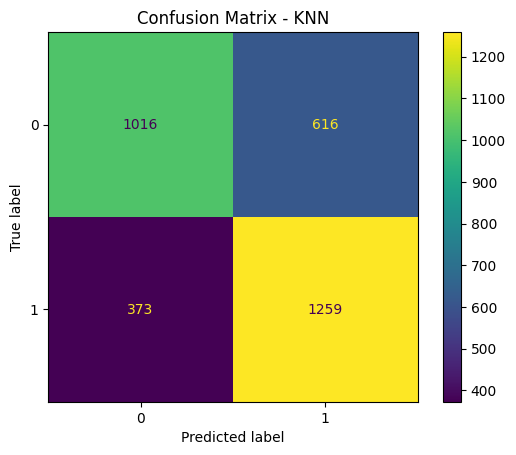


Confusion Matrix for SVC:
[[ 172 1460]
 [ 451 1181]]

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.28      0.11      0.15      1632
           1       0.45      0.72      0.55      1632

    accuracy                           0.41      3264
   macro avg       0.36      0.41      0.35      3264
weighted avg       0.36      0.41      0.35      3264



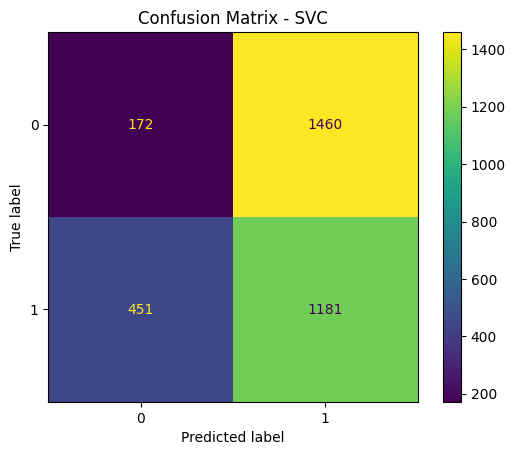


Confusion Matrix for Random Forest:
[[1375  257]
 [ 698  934]]

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1632
           1       0.78      0.57      0.66      1632

    accuracy                           0.71      3264
   macro avg       0.72      0.71      0.70      3264
weighted avg       0.72      0.71      0.70      3264



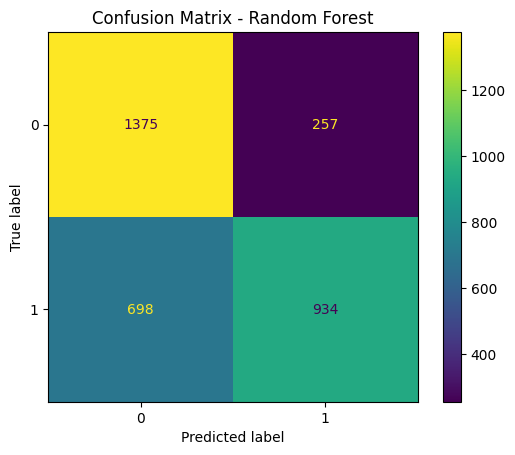


Confusion Matrix for Logistic Regression:
[[1565   67]
 [ 998  634]]

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.61      0.96      0.75      1632
           1       0.90      0.39      0.54      1632

    accuracy                           0.67      3264
   macro avg       0.76      0.67      0.64      3264
weighted avg       0.76      0.67      0.64      3264



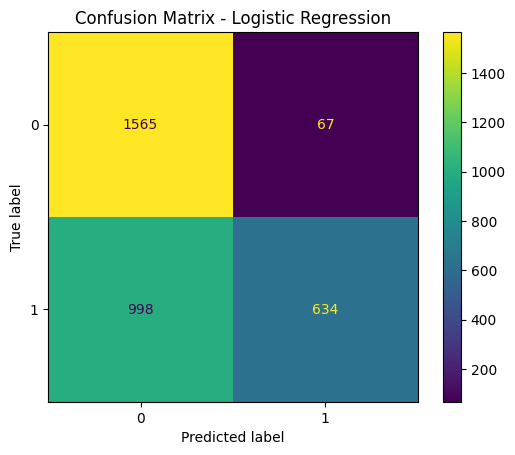


Confusion Matrix for Decision Tree:
[[1430  202]
 [ 748  884]]

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.66      0.88      0.75      1632
           1       0.81      0.54      0.65      1632

    accuracy                           0.71      3264
   macro avg       0.74      0.71      0.70      3264
weighted avg       0.74      0.71      0.70      3264



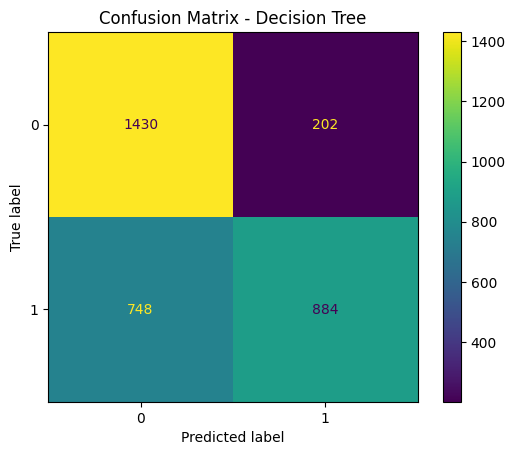

In [214]:
for name, model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:\n{cm}")

    
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    
    display_labels = sorted(y.unique())  
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()